# Data analysis

### download libraries

In [99]:
import numpy as np
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

### download datasets

In [147]:
# !pip install skyfield

In [2]:
from skyfield.api import Star, load
from skyfield.data import hipparcos

### Make a dictionary of the constellation names of the format $\newline$ {abbreviation: constellation_name...}

In [169]:
constellations_names_csv = pd.read_csv("data/constellation_names.csv", delimiter= ',', header = None)
constellations_names_csv.columns = ['cons_name_abb', 'cons_name', 'cons_name_std']

In [3]:
# print(constellations_names_csv)

In [170]:
constellation_names = {}
for rows, cols in constellations_names_csv.iterrows():
    constellation_names[cols['cons_name_abb']] =  cols['cons_name']
print(constellation_names)

{'Aql': 'Aquila', 'And': 'Andromeda', 'Scl': 'Sculptor', 'Ara': 'Ara', 'Lib': 'Libra', 'Cet': 'Cetus', 'Ari': 'Aries', 'Pyx': 'Pyxis', 'Boo': 'Bootes', 'Cae': 'Caelum', 'Cha': 'Chamaeleon', 'Cnc': 'Cancer', 'Cap': 'Capricornus', 'Car': 'Carina', 'Cas': 'Cassiopeia', 'Cen': 'Centaurus', 'Cep': 'Cepheus', 'Com': 'Coma Berenices', 'Cvn': 'Canes Venatici', 'Aur': 'Auriga', 'Col': 'Columba', 'Cir': 'Circinus', 'Crt': 'Crater', 'CrA': 'Corona Australis', 'CrB': 'Corona Borealis', 'Crv': 'Corvus', 'Cru': 'Crux', 'Cyg': 'Cygnus', 'Del': 'Delphinus', 'Dor': 'Dorado', 'Dra': 'Draco', 'Nor': 'Norma', 'Eri': 'Eridanus', 'Sge': 'Sagitta', 'For': 'Fornax', 'Gem': 'Gemini', 'Cam': 'Camelopardalis', 'CMa': 'Canis Major', 'UMa': 'Ursa Major', 'Gru': 'Grus', 'Her': 'Hercules', 'Hor': 'Horologium', 'Hya': 'Hydra', 'Hyi': 'Hydrus', 'Ind': 'Indus', 'Lac': 'Lacerta', 'Mon': 'Monoceros', 'Lep': 'Lepus', 'Leo': 'Leo', 'Lup': 'Lupus', 'Lyn': 'Lynx', 'Lyr': 'Lyra', 'Ant': 'Antlia', 'Mic': 'Microscopium', 'Mus':

### constellations_art

In [139]:
constellations_art_csv = pd.read_csv("data/constellations_art.csv", delimiter=' ', header = None, error_bad_lines=False)
constellations_art_csv.loc[-1] = ["Ara","ara.png", "98", "70", "83081", "191", "93", "85727", "107", "249", "88714"] 
constellations_art_csv.loc[-2] = ["Sge", "sagitta.png", "6", "12", "98920", "249", "213", "96757", "218", "243", "96837"] 

constellations_art_csv.columns = ['cons_name_abb', 'image', "star1_x", "star1_y", "star1_hip", "star2_x", "star2_y", "star2_hip", "star3_x", "star3_y", "star3_hip"]

b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 12\n'


In [142]:
print(constellations_art_csv)

    cons_name_abb          image star1_x star1_y star1_hip star2_x star2_y  \
 0            And  andromeda.png     198     215      3881     337     136   
 1            Ant     antlia.png       4      84     51172      72      69   
 2            Aps       apus.png      66      60     81852      76      87   
 3            Aql     aquila.png     163     232     97649     385     131   
 4            Aqr   aquarius.png     144     464    115438     179      98   
..            ...            ...     ...     ...       ...     ...     ...   
 80           Vir      virgo.png      65     389     72220     454      57   
 81           Vol     volans.png      55      85     44382     210     122   
 82           Vul  vulpecula.png      35     133     98543     174     111   
-1            Ara        ara.png      98      70     83081     191      93   
-2            Sge    sagitta.png       6      12     98920     249     213   

    star2_hip star3_x star3_y star3_hip  
 0       3092     224

### constellations_hip

In [117]:
column_names = list(range(1,60))
constellations_hip_csv = pd.read_csv("data/constellations_hip.csv", delimiter=' ', header = None, names = column_names)

In [8]:
# print(constellations_hip_csv)

In [118]:
constellations_lines = {}
for i in range(88):
    constellations_lines[constellations_hip_csv[1][i]] = constellations_hip_csv[2][i]
# print(constellations_lines)

In [119]:
constellation_lines_bw_hip = {}
hip_values = []
for i in range(88):
    for j in range(3,59):
        if not(math.isnan(float(constellations_hip_csv[j][i]))):
            hip_values.append(constellations_hip_csv[j][i])
    constellation_lines_bw_hip[constellations_hip_csv[1][i]] = hip_values
    hip_values = []
print(constellation_lines_bw_hip)

{'Aql': ['98036', 97649.0, 97649.0, 97278.0, 97649.0, 95501.0, 95501.0, 97804.0, 99473.0, 97804.0, 95501.0, 93747.0, 93747.0, 93244.0, 95501.0, 93805.0], 'And': ['677', 3092.0, 3092.0, 5447.0, 9640.0, 5447.0, 5447.0, 4436.0, 4436.0, 3881.0], 'Scl': ['116231', 4577.0, 4577.0, 115102.0, 115102.0, 116231.0], 'Ara': ['88714', 85792.0, 85792.0, 83081.0, 83081.0, 82363.0, 82363.0, 85727.0, 85727.0, 85267.0, 85267.0, 85258.0, 85258.0, 88714.0], 'Lib': ['77853', 76333.0, 76333.0, 74785.0, 74785.0, 72622.0, 72622.0, 73714.0, 73714.0, 76333.0], 'Cet': ['10324', 11484.0, 8102.0, 3419.0, 3419.0, 1562.0, 3419.0, 5364.0, 5364.0, 6537.0, 6537.0, 8645.0, 8645.0, 11345.0, 11345.0, 12390.0, 12390.0, 12770.0, 12770.0, 11783.0, 11783.0, 8102.0, 10826.0, 12390.0, 10826.0, 12387.0, 12387.0, 12706.0, 12706.0, 14135.0, 14135.0, 13954.0, 13954.0, 12828.0, 12828.0, 11484.0, 11484.0, 12093.0, 12093.0, 12706.0], 'Ari': ['13209', 9884.0, 9884.0, 8903.0, 8903.0, 8832.0], 'Sct': ['92175', 92202.0, 92202.0, 92814.0, 

### star_names.csv

In [22]:
column_names = list(range(50))
star_names_csv = pd.read_csv("data/star_names.csv", delimiter='\s+| | |,', names = column_names, error_bad_lines=False)

In [12]:
# print(star_names_csv)

In [45]:
list_temp = []
whole_temp = []
name = ""
for i in range(1, 1176):
    for j in range(0,50):
        if str(star_names_csv[j][i]) != 'nan':
            if star_names_csv[j][i] != None :
                list_temp.append(star_names_csv[j][i])
    whole_temp.append(list_temp)    
    list_temp = []

star_names = {}
together_list = []
for i in range(len(whole_temp)):
    if whole_temp[i][0] == "#":
        star_names[name] = together_list
        together_list = []
        name = whole_temp[i][1]
    else:
        together_list.append(whole_temp[i])
star_names[name] = together_list

# for i in star_names:
#     print(i)
#     print()
print(star_names['Aquila'])

[['97649|_("Altair")', '1', '2', '6', '11', '12', '23', '37', '38'], ['97649|_("Atair")', '37'], ['98036|_("Alshain")', '1', '2', '6', '11', '12', '23', '37', '38'], ['98036|_("Alschairn")', '37'], ['97278|_("Tarazed")', '1', '2', '6', '11', '12', '23', '37', '38'], ['97278|_("Reda")', '23', '37'], ['97938|_("Libertas")', '4', '6', '12'], ['93805|_("Al', 'Thalimain', 'Prior")', '2', '5', '11'], ['93805|_("Al', 'Thalimain', 'I")'], ['96468|_("Al', 'Thalimain', 'Posterior")', '2', '5', '11'], ['96468|_("Al', 'Thalimain', 'II")'], ['96468|_("Althalimain")', '38'], ['93747|_("Okab")', '12'], ['93747|_("Deneb', 'al', 'Okab', 'Australis")', '5', '10'], ['93747|_("Deneb', 'el', 'Okab")', '37'], ['93747|_("Dheneb")', '38'], ['93244|_("Deneb', 'al', 'Okab', 'Borealis")', '5', '10'], ['93244|_("Deneb', 'el', 'Okab")'], ['95501|_("Almizan', 'I")', '11'], ['95501|_("Deneb', 'Okab")', '23'], ['97804|_("Almizan', 'II")', '11'], ['99473|_("Almizan', 'III")', '11'], ['99711|_("Phoenicia")', '36'], ['9

### ssystems_major.csv

In [2]:
with open('data/ssystem_major.csv', newline='') as f:
    reader = csv.reader(f)
    temp_data_ssystem_major = list(reader)

# print(temp_data_ssystem)

In [3]:
data_ssystem_major = []

for i in range(len(temp_data_ssystem_major)):
    try:
        if temp_data_ssystem_major[i][0][0] != "#":
            data_ssystem_major.append(temp_data_ssystem_major[i])
    except:
        continue
# print(data_ssystem)

In [13]:
temp_major = []
temp2_major = []
for i in range(len(data_ssystem_major)):
    if "type=" not in data_ssystem_major[i][0]:
        temp_major.append(data_ssystem_major[i])
    else:
        temp_major.append(data_ssystem_major[i])
        temp2_major.append(temp_major)
        temp_major = []
print(len(temp2_major))        
for i in temp2_major:
    print(i)
#     for j in i:
# #         print(j)
#         if "parent" in j[0]:
#             print(j[0])
    print()

78
[['[adrastea]'], ['iau_moon_number=JXV'], ['absolute_magnitude=12.4'], ['albedo=0.1'], ['color=1.', ' 0.9', ' 0.75'], ['name=Adrastea'], ['orbit_AscendingNode=253.6924110934923'], ['orbit_Eccentricity=0.006543120249224196'], ['orbit_Epoch=2454619.50000'], ['orbit_Inclination=0.06166936906340893'], ['orbit_LongOfPericenter=249.4662007624690000'], ['orbit_MeanLongitude=252.4809048448870000'], ['orbit_Period=0.3023760117035458'], ['orbit_SemiMajorAxis=129866.6459712491'], ['parent=Jupiter'], ['radius=8.2'], ['rot_equator_ascending_node=213.7'], ['rot_obliquity=15.5'], ['rot_rotation_offset=309.52'], ['rot_pole_ra=268.05'], ['rot_pole_ra1=-0.009'], ['rot_pole_de=64.49'], ['rot_pole_de1=0.003'], ['rot_pole_w0=33.29'], ['rot_pole_w1=1206.9986602'], ['tex_map=lune.png'], ['type=moon']]

[['[amalthea]'], ['iau_moon_number=JV'], ['absolute_magnitude=7.4'], ['albedo=0.09'], ['color=1.', ' 0.627', ' 0.492'], ['name=Amalthea'], ['model=j5amalthea_MLfix.obj'], ['orbit_AscendingNode=141.552152079

In [ ]:
cols = range(87)

df = pd.DataFrame(temp2, columns=cols)
# print(df)

### ssystems_minor.csv

In [14]:
with open('data/ssystem_minor.csv', newline='') as f:
    reader1 = csv.reader(f)
    temp_data_ssystem_minor = list(reader1)
    
# print(temp_data_ssystem_minor)

In [15]:
data_ssystem_minor = []

for i in range(len(temp_data_ssystem_minor)):
    try:
        if temp_data_ssystem_minor[i][0][0] != "#":
            data_ssystem_minor.append(temp_data_ssystem_minor[i])
    except:
        continue
# print(data_ssystem_minor)

In [20]:
temp_minor = [data_ssystem_minor[0][0]]
temp2_minor = []
for i in range(1,len(data_ssystem_minor)):
    if "=" in data_ssystem_minor[i][0]:
        temp_minor.append(data_ssystem_minor[i])
    else:
#         temp_minor.append(data_ssystem_minor[i])
        temp2_minor.append(temp_minor)
        temp_minor = [data_ssystem_minor[i]]
        
for i in temp2_minor:
#     print(i)
    for j in i:
        if "type" in j[0]:
            print(j[0])
    print()

type                        = artificial

type                           = interstellar object

type = interstellar object

type=asteroid

type=comet

type=comet

type=cubewano

type=asteroid

type = asteroid

type = comet

type=dwarf planet

type=dwarf planet

type=dwarf planet

type=comet

type=comet

type=asteroid

type=comet

type=asteroid

type=cubewano

type=asteroid

type=asteroid

type=comet

type=asteroid

type=asteroid

type=comet

type=dwarf planet

type=comet

type=cubewano

type=asteroid

type=asteroid

type=asteroid

type=asteroid

type=asteroid

type=plutino

type=comet

type=asteroid

type=comet

type=comet

type=scattered disc object

type=scattered disc object

type=comet

type=comet

type=asteroid

type=comet

type=asteroid

type=comet

type=asteroid

type=comet

type=cubewano

type=asteroid

type=asteroid

type=comet

type=asteroid

type=asteroid

type=asteroid

type=comet

type=plutino

type=asteroid

type=asteroid

type=comet

type=asteroid

type=comet

type=comet

### base_locations.txt

In [ ]:
with open('data/base_locations.txt', newline='') as f:
    reader2 = csv.reader(f)
    base_locations_csv = list(reader2)
# print(base_locations_csv)

In [ ]:
base_locations_t = []

for i in range(len(base_locations_csv)):
    try:
        if base_locations_csv[i][0][0] != "#":
            base_locations_t.append(base_locations_csv[i])
    except:
        continue

# for i in base_locations:
#     print(i)
#     print()

In [ ]:
temp_base = []
temp_base2 = []
str = ""
for i in base_locations_t:
    i.append("\t")
    for char in i[ : :1][0]:
        if char != "\t":
            str = str+char
        else:
            temp_base.append(str)
            str = ""
    temp_base.append(str)
    str = ""
    temp_base2.append(temp_base)
    temp_base = []
    
# for j in temp_base2:
#     print(j)
        

In [ ]:
cols = ["LocationName", "Provice/State", "Region", "Type code", "Population (thousand)", 
        "Latitude (deg[N/S]", "Longitude (deg[E/W])", "Altitude (meters)", 
        "Light Pollution (1-9 Bortle scale)", "TimeZone", "Planet", "LandscapeKey"]
base_locations = pd.DataFrame(temp_base2, columns=cols)
print(base_locations)

### lets take out some data

In [10]:
print(constellations_art_csv)

    cons_name_abb          image star1_x star1_y star1_hip star2_x star2_y  \
 0            And  andromeda.png     198     215      3881     337     136   
 1            Ant     antlia.png       4      84     51172      72      69   
 2            Aps       apus.png      66      60     81852      76      87   
 3            Aql     aquila.png     163     232     97649     385     131   
 4            Aqr   aquarius.png     144     464    115438     179      98   
..            ...            ...     ...     ...       ...     ...     ...   
 80           Vir      virgo.png      65     389     72220     454      57   
 81           Vol     volans.png      55      85     44382     210     122   
 82           Vul  vulpecula.png      35     133     98543     174     111   
-1            Ara        ara.png      98      70     83081     191      93   
-2            Sge    sagitta.png       6      12     98920     249     213   

    star2_hip star3_x star3_y star3_hip  
 0       3092     224

# Visualizing the values

### constellations_art_csv

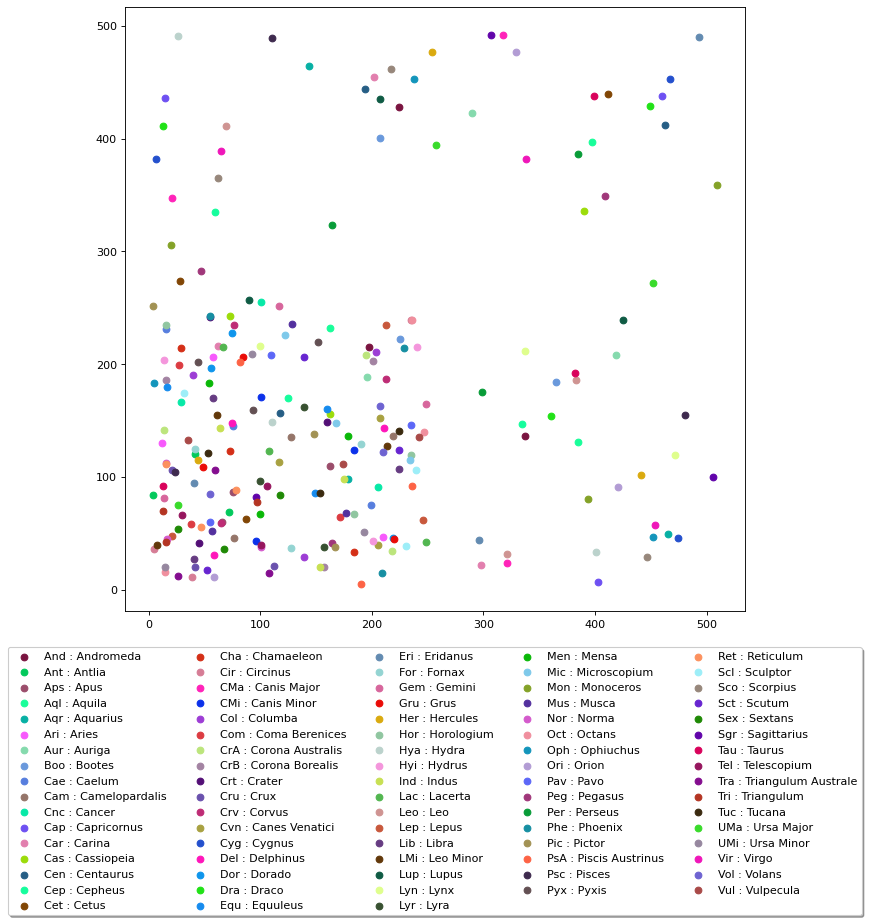

In [121]:
star1_x, star1_y, star2_x, star2_y, star3_x, star3_y = [], [], [], [], [], []
star_x, star_y = [], []

for i in range(len(constellations_art_csv)):
    star1_x = list(constellations_art_csv['star1_x'])
    star1_y = list(constellations_art_csv['star1_y'])
    star2_x = list(constellations_art_csv['star2_x'])
    star2_y = list(constellations_art_csv['star2_y'])
    star3_x = list(constellations_art_csv['star3_x'])
    star3_y = list(constellations_art_csv['star3_y'])
    abb = list(constellations_art_csv['cons_name_abb'])

plt.figure(figsize=(10,10), dpi=80)

for i in range(83):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    star_x = ([star1_x[i], star2_x[i], star3_x[i]])
    star_y = ([star1_y[i], star2_y[i], star3_y[i]])
    plt.scatter(star_x, star_y, color = color, label = "{} : {}".format(abb[i], 
                                                                   constellation_names[abb[i]]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# BSC5 Catalogue

In [37]:
cols = range(5)
bsc5_dat = pd.read_csv("data/bsc5.txt", names=cols, header=None)

In [38]:
print(bsc5_dat)

                                                      0    1   2   3   4
0        1          BD+44 4550      3 36042         ...  NaN NaN NaN NaN
1        2          BD-01 4525      6128569         ...  NaN NaN NaN NaN
2        3 33    PscBD-06 6357     281285721002I    ...  NaN NaN NaN NaN
3        4 86    PegBD+12 5063     87 917012004     ...  NaN NaN NaN NaN
4        5          BD+57 2865    123 21085         ...  NaN NaN NaN NaN
...                                                 ...  ...  ..  ..  ..
9105  9106          CP-73 2346 225233255629         ...  NaN NaN NaN NaN
9106  9107          BD+33 4828 225239 536222002     ...  NaN NaN NaN NaN
9107  9108          CP-72 2800 2252532556311001     ...  NaN NaN NaN NaN
9108  9109          BD+25 5068 225276 73731    I    ...  NaN NaN NaN NaN
9109  9110          BD+60 2667 225289 10962         ...  NaN NaN NaN NaN

[9110 rows x 5 columns]


# Skyfield (hip_main.dat)

### RA and Dec ( RAhms and DEdms)
* **RA** is the position of a star measured in the east–west direction on the sky (like longitude, the position of a place on Earth measured east or west of the prime meridian at Greenwich, England).
* **Dec** is the position of the star measured in the north–south direction, like the latitude of a city, which is measured north or south of the equator.
* RA in **units of hours, minutes, and seconds**, like time. We list Dec in **degrees, minutes, and seconds of arc**. Ninety degrees make up a right angle, 60 minutes of arc make up a degree, and 60 seconds of arc equal a minute of arc. A minute or second of arc is also often called an “arc minute” or an “arc second,” respectively.
* The process will be to convert the equitorial coordinates to the galactic coordinates so that they can be plotted using matplotlib.
 * **ra, dec = equatorial coordinates**
 * **l,b = galatic coordinates**
* For this, first convert the ra and dec values into degrees and then convert these values into the galatic coordinates

In [12]:
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/data/hipparcos.py
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/documentation/stars.rst

COLUMN_NAMES = ('Catalog', 'hip', 'Proxy', 'RAhms', 'DEdms', 'Vmag',
    'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA',
    'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA',
    'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag',
    'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V',
    'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat',
    'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType',
    'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',)

hip_main_txt = pd.read_csv("data/hip_main.txt", delimiter = "|", 
                           names=COLUMN_NAMES, compression=None)
hip_main_txt = hip_main_txt.set_index('hip')

In [70]:
# print(len(hip_main_txt['hip']))

118218


## get RA and Dec values from hip values

In [13]:
def get_RA_dec_by_hip(hip):
    RA_list = []
    Dec_list = []
    for rows, cols in hip_main_txt.iterrows():
        if rows == hip:
            RA_list = cols['RAhms'].split()
            Dec_list = cols['DEdms'].split()
            print("RA : {}h, {}m, {}s".format(RA_list[0], RA_list[1], RA_list[2]))
            print("Dec : {}deg, {}m, {}s".format(Dec_list[0], Dec_list[1], Dec_list[2]))
            return RA_list, Dec_list

RA, Dec = get_RA_dec_by_hip(87937)

RA : 17h, 57m, 48.97s
Dec : +04deg, 40m, 05.8s


## get RA and Dec values (in degrees) from hip values

In [102]:
def get_RA_dec_by_hip_degree(hip):
    for rows, cols in hip_main_txt.iterrows():
        if rows == hip:
            return (cols['RAdeg'], cols['DEdeg'])
            

RA_deg, Dec_deg = get_RA_dec_by_hip_degree(1)
print("RA: {} and Dec: {}".format(RA_deg, Dec_deg))

RA: 000.00091185 and Dec: +01.08901332


## Convert equatorial coordinates (ra, dec) and galactic coordinates (𝑙,𝑏)
###  𝑏=𝑠𝑖𝑛−1(𝑐𝑜𝑠(dec)∗𝑐𝑜𝑠(27.4)∗𝑐𝑜𝑠(ra−192.25)+𝑠𝑖𝑛(dec)∗𝑠𝑖𝑛(27.4))
### 𝑙=𝑡𝑎𝑛−1(𝑠𝑖𝑛(dec)−𝑠𝑖𝑛(𝑏)∗𝑠𝑖𝑛(27.4)𝑐𝑜𝑠(dec)∗𝑐𝑜𝑠(27.4)∗𝑠𝑖𝑛(ra−192.25))+33

In [74]:
#where (𝛼,𝛿) is the (ra, dec) values

def equ2gal(ra, dec):
    
    ra = np.deg2rad(float(ra))
    dec = np.deg2rad(float(dec))
    b = np.arcsin(np.cos(dec)*np.cos(27.4)*np.cos(ra-192.25)+
         np.sin(dec)*np.sin(27.4))
    l = np.arctan((np.sin(dec)-np.sin(b))*np.sin(27.4)*
                  np.cos(dec)*np.cos(27.4)*np.sin(ra-192.25))+33
    return l, b

x_pos = []
y_pos = []

for rows, cols in hip_main_txt.iterrows():
    try:
        ra = float(cols['RAdeg'])
    except:
        ra = 0
    try:
        dec = float(cols['DEdeg'])
    except:
        dec = 0
    l, b = equ2gal(ra, dec)
    x_pos.append(l)
    y_pos.append(b)

hip_main_txt["x_position"] = x_pos
hip_main_txt["y_position"] = y_pos

In [103]:
print(equ2gal(000.00091185, +01.08901332))

(33.146182060432565, 0.5695493882865139)


## Visualizing data (x,y, hip)

118218


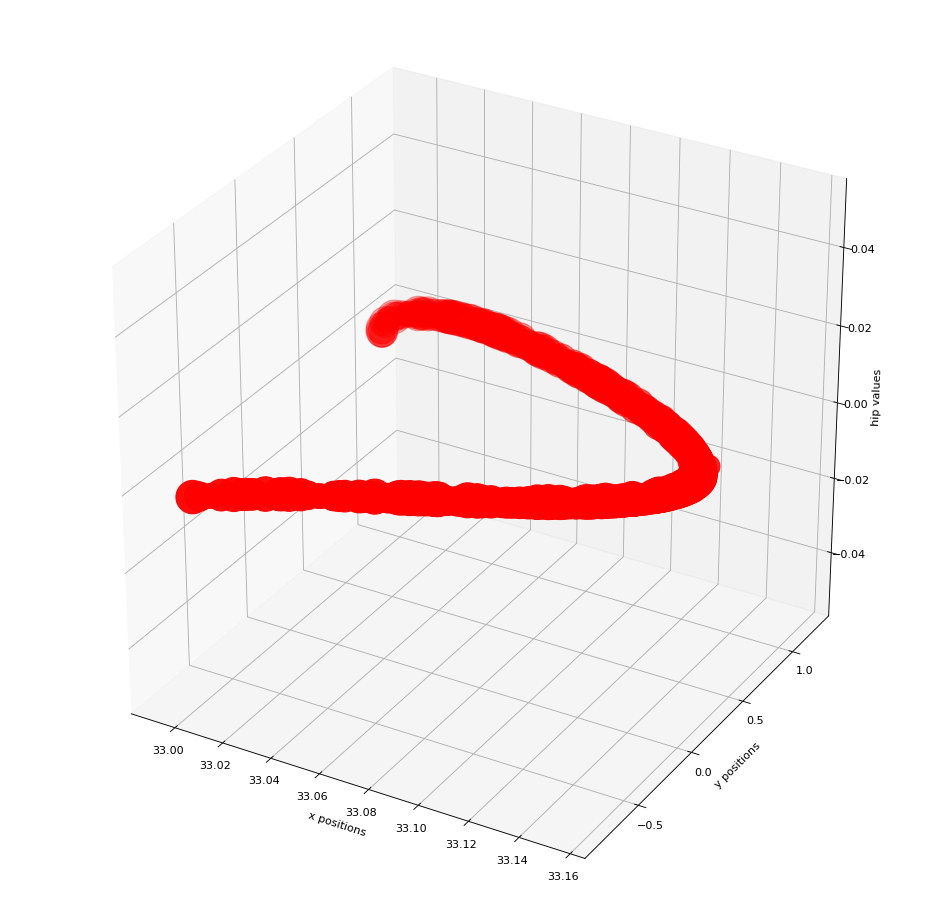

In [7]:
print(len(hip_main_txt["x_position"]))
x = hip_main_txt["x_position"][0:1000]
y = hip_main_txt["y_position"][0:1000]
z = hip_main_txt.index[0:1000]

fig = plt.figure(figsize=(15,15), dpi=80)
ax = plt.subplot(111, projection = "3d")
ax.set_xlabel("x positions")
ax.set_ylabel("y positions")
ax.set_zlabel("hip values")

plt.scatter(x,y,z, c='r')
plt.show()

## display the constellations

In [100]:
def display_constellations_by_abb(name):
    x = []
    y = []
    # get all the hip numbers of a constellation
    for i in constellation_lines_bw_hip[name]:
        # get the ra and dec values in degree from hip number
        
        r, d = get_RA_dec_by_hip_degree(float(i))
        # convert r, d to galatic coordinates
        l, b = equ2gal(r, d)
        x.append(l)
        y.append(b)
    # connect successive points to form a constellation
    for i in range(0, len(x), 2):
        plt.plot(np.round(x[i:i+2],3), np.round(y[i:i+2],3), 'ro-')
    print(x, y)
    print("---------------")
    print(constellation_lines_bw_hip[name])


[32.89509098016843, 32.8974375579032, 32.8974375579032, 32.92814392166212, 32.92814392166212, 32.90293348201363, 32.90293348201363, 32.89214075709696, 32.89214075709696, 32.89509098016843] [-0.32211549651420474, -0.3343566104029936, -0.3343566104029936, -0.44684027410167476, -0.44684027410167476, -0.5036601772003932, -0.5036601772003932, -0.40215355940850817, -0.40215355940850817, -0.32211549651420474]
---------------
['92175', 92202.0, 92202.0, 92814.0, 92814.0, 90595.0, 90595.0, 91117.0, 91117.0, 92175.0]


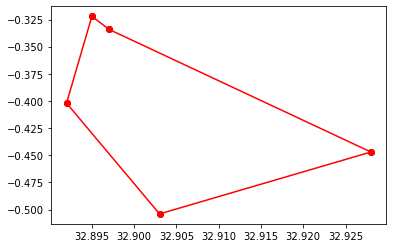

In [101]:
display_constellations_by_abb('Sct')

## Dataframe and csv

Till now the code is very slow, so I will try to convert it into a dataframe.
The dataframe will have the following columns:
* hip
* ra (in deg)
* dec (in deg)
* l
* b

In [19]:
hip = list(hip_main_txt.index)
ra = list(hip_main_txt['RAdeg'])
dec = list(hip_main_txt['DEdeg'])

cons_details = pd.DataFrame()
cons_details['hip'] = hip
cons_details['ra_degree'] = ra
cons_details['dec_degree'] = dec
# print(cons_details)

In [105]:
l = []
b = []
for i in range(1, 50001):
    try:
        r = float(cons_details['ra_degree'][i])
    except:
        r = 0
    try:
        d = float(cons_details['dec_degree'][i])
    except:
        d = 0
    list_l, list_b = equ2gal(r, d)
    l.append(list_l)
    b.append(list_b)
# print(l , b)

In [106]:
for i in range(50001, 118219):
    try:
        r = float(cons_details['ra_degree'][i])
    except:
        r = 0
    try:
        d = float(cons_details['dec_degree'][i])
    except:
        d = 0
    list_l, list_b = equ2gal(r, d)
    l.append(list_l)
    b.append(list_b)

In [110]:
cons_details['l_value'] = l
cons_details['b_value'] = b
# cons_details = cons_details.set_index('hip')
# print(cons_details)
print(l[0:5])
print(b[0:5])
print(cons_details)

[33.146182060432565, 33.15155299282359, 33.05779634019187, 33.08833798337465, 33.11766086823969]
[0.5695493882865139, 0.24095994926580427, 1.0972309975855212, -0.28352395291685617, -0.10076304160735447]
           ra_degree    dec_degree    l_value   b_value
hip                                                    
1       000.00091185  +01.08901332  33.146182  0.569549
2       000.00379737  -19.49883745  33.151553  0.240960
3       000.00500795  +38.85928608  33.057796  1.097231
4       000.00838170  -51.89354612  33.088338 -0.283524
5       000.00996534  -40.59122440  33.117661 -0.100763
...              ...           ...        ...       ...
118318  359.96374383  +11.67370866  33.037687  1.158188
118319  359.97391252  -22.42818030  33.142541  0.098949
118320  359.97605747  +05.95663786  33.033300  1.168780
118321  359.97823891  -64.37257220  33.080559  1.001007
118322  359.97879195  -65.57707774  33.041587  1.147666

[118218 rows x 4 columns]


### Writing dataframe to the csv file

In [115]:
cons_details.to_csv('data_collected/cons_details_csv.csv', index=True, sep='\t')

## Using data from .csv file to draw constellations

In [116]:
collected_data = pd.read_csv("data_collected/cons_details_csv.csv", delimiter="\t")
print(collected_data)

           hip     ra_degree    dec_degree    l_value   b_value
0            1  000.00091185  +01.08901332  33.146182  0.569549
1            2  000.00379737  -19.49883745  33.151553  0.240960
2            3  000.00500795  +38.85928608  33.057796  1.097231
3            4  000.00838170  -51.89354612  33.088338 -0.283524
4            5  000.00996534  -40.59122440  33.117661 -0.100763
...        ...           ...           ...        ...       ...
118213  118318  359.96374383  +11.67370866  33.037687  1.158188
118214  118319  359.97391252  -22.42818030  33.142541  0.098949
118215  118320  359.97605747  +05.95663786  33.033300  1.168780
118216  118321  359.97823891  -64.37257220  33.080559  1.001007
118217  118322  359.97879195  -65.57707774  33.041587  1.147666

[118218 rows x 5 columns]


In [117]:
cons_name = "Sct"
hip_values = constellation_lines_bw_hip[cons_name]
print(hip_values)

['92175', 92202.0, 92202.0, 92814.0, 92814.0, 90595.0, 90595.0, 91117.0, 91117.0, 92175.0]


[32.88856312156224, 32.88687501244505, 32.88687501244505, 32.92696934184532, 32.92696934184532, 32.9191791119999, 32.9191791119999, 33.01732528088339, 33.01732528088339, 32.88856312156224] [-0.2877713114940508, -0.2719142526805163, -0.2719142526805163, 0.5776369845381474, 0.5776369845381474, -0.5879938222762496, -0.5879938222762496, -0.9573536974911092, -0.9573536974911092, -0.2877713114940508]


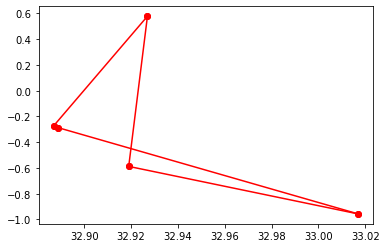

In [119]:
temp_l = []
temp_b = []
for i in hip_values:
#     print(i)
#     print(collected_data.loc[collected_data['hip'] == float(i)])
    pos = collected_data.loc[collected_data['hip'] == float(i)].index[0]
#     pos_2 = collected_data.loc[collected_data['hip'] == float(i)]['b_value']
    temp_l.append(collected_data['l_value'][pos])
    temp_b.append(collected_data['b_value'][pos])

# print(pos_1, pos_2)
print(temp_l, temp_b)
# print(collected_data.loc[collected_data['hip'] == float(i)])
for i in range(0, len(temp_l), 2):
    plt.plot(np.round(temp_l[i:i+2],3), np.round(temp_b[i:i+2],3), 'ro-')

### HYG dataset

In [25]:
hyg_visualization = pd.read_csv("data/hygdata_v3.csv")

In [36]:
print(hyg_visualization.keys())

Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')


In [35]:
l = list(hyg_visualization['proper'])
for i in l:
    if str(i) != 'nan':
        print(i)


Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')
Sol
Alpheratz
Caph
Algenib
Ankaa
Shedir
Diphda
96 G. Psc
Van Maanen's Star
Cih
Mirach
Ruchbah
Achernar
Sheratan
Almaak
Hamal
Mira
Polaris
268 G. Cet
Acamar
Menkar
Algol
82 G. Eri
Mirphak
Alcyone
Zaurak
Aldebaran
Hassaleh
Cursa
Kapteyn's Star
Rigel
Capella
Bellatrix
Alnath
Nihal
Mintaka
Arneb
Hatsya
Alnilam
Phakt
Alnitak
Saiph
Betelgeuse
Menkalinan
Red Rectangle
Mirzam
Canopus
Alhena
Sirius
Adhara
Wezen
Aludra
Gomeisa
Luyten's Star
Castor
Procyon
Pollux
Naos
Avior
Miaplacidus
Tureis
Alphard
Ras Elased Australis
Regulus
Algieba
Merak
Lalande 21185
Dubhe
Zosma
Denebola
Groombridge 1830
Phad
Megrez
Gienah Ghurab
Acrux
3C 273
Algorab
Gacrux
Kraz
Por

### Exoplanet catalog

In [243]:
cols = range(20)
exo = pd.read_csv("data/exoplanet.eu_catalog.dat", delimiter = '\t')

In [274]:
# exo.keys()

In [247]:
# print(exo.head(2))
collect_name = exo['# name']
collect_mass = exo['mass']
collect_distance = exo['star_distance']
print(len(collect_mass), len(collect_distance), len(collect_name))
# print(collect_distance)

4870 4870 4870
0       110.60
1       145.00
2       119.50
3        76.40
4        18.10
         ...  
4865     13.47
4866     13.47
4867     13.47
4868     13.47
4869     67.48
Name: star_distance, Length: 4870, dtype: float64


In [305]:
# getting cons names from star names
collect_temp_cons_name = [" "]* 4870
collect_name = list(collect_name)
for i in range(len(collect_name)):
#     print(i)
    try:
        s = collect_name[i].split()[1]
        collect_temp_cons_name[i] = constellation_names[s]
#         print(s)
    except:
        continue
print(len(collect_temp_cons_name))

4870


In [342]:
# getting hip numbers from star names
collect_temp_hip = [" "]* 4870
collect_name = list(collect_name)
for i in range(len(collect_name)):
#     print(i)
    if collect_name[i].split()[0] == 'HIP':
#         print("yes")
        collect_temp_hip[i] = collect_name[i].split()[1]
# #         print(s)
#     except:
#         continue
# print(collect_temp_hip)

# Let's collect some data

So far I have collected :
* hip
* mag
* ra and dec (units)
* ra and dec (deg)
* x and y
* constellation names

### Data description

In [ ]:
'''
--          * New *    Name               /Catalog Designation
H0          Catalog    * Not Displayed *  /Catalogue (H=Hipparcos)
H1          HIP        HIP_Number         /Identifier (HIP number)
H2          Proxy      Prox_10asec        /Proximity flag
H3          RAhms      RA                 /RA in h m s, ICRS (J1991.25)
H4          DEdms      Dec                /Dec in deg ' ", ICRS (J1991.25)
H5          Vmag       Vmag               /Magnitude in Johnson V
H6          VarFlag    Var_Flag           /Coarse variability flag
H7          r_Vmag     Vmag_Source        /Source of magnitude
H8          RAdeg      RA_Deg             /RA in degrees (ICRS, Epoch-J1991.25)
H9          DEdeg      Dec_Deg            /Dec in degrees (ICRS, Epoch-J1991.25)
H10         AstroRef   Astrom_Ref_Dbl     /Reference flag for astrometry
H11         Plx        Parallax           /Trigonometric parallax
H12         pmRA       pm_RA              /Proper motion in RA
H13         pmDE       pm_Dec             /Proper motion in Dec
H14         e_RAdeg    RA_Error           /Standard error in RA*cos(Dec_Deg)
H15         e_DEdeg    Dec_Error          /Standard error in Dec_Deg
H16         e_Plx      Parallax_Error     /Standard error in Parallax
H17         e_pmRA     pm_RA_Error        /Standard error in pmRA
H18         e_pmDE     pm_Dec_Error       /Standard error in pmDE
H19         DE:RA      Crl_Dec_RA         /(DE over RA)xCos(delta)
H20         Plx:RA     Crl_Plx_RA         /(Plx over RA)xCos(delta)
H21         Plx:DE     Crl_Plx_Dec        /(Plx over DE)
H22         pmRA:RA    Crl_pmRA_RA        /(pmRA over RA)xCos(delta)
H23         pmRA:DE    Crl_pmRA_Dec       /(pmRA over DE)
H24         pmRA:Plx   Crl_pmRA_Plx       /(pmRA over Plx)
H25         pmDE:RA    Crl_pmDec_RA       /(pmDE over RA)xCos(delta)
H26         pmDE:DE    Crl_pmDec_Dec      /(pmDE over DE)
H27         pmDE:Plx   Crl_pmDec_Plx      /(pmDE over Plx)
H28         pmDE:pmRA  Crl_pmDec_pmRA     /(pmDE over pmRA)
H29         F1         Reject_Percent     /Percentage of rejected data
H30         F2         Quality_Fit        /Goodness-of-fit parameter
H31         ---        * Not Displayed *  /HIP number (repetition)
H32         BTmag      BT_Mag             /Mean BT magnitude
H33         e_BTmag    BT_Mag_Error       /Standard error on BTmag
H34         VTmag      VT_Mag             /Mean VT magnitude
H35         e_VTmag    VT_Mag_Error       /Standard error on VTmag
H36         m_BTmag    BT_Mag_Ref_Dbl     /Reference flag for BT and VTmag
H37         B-V        BV_Color           /Johnson BV colour
H38         e_B-V      BV_Color_Error     /Standard error on BV
H39         r_B-V      BV_Mag_Source      /Source of BV from Ground or Tycho
H40         V-I        VI_Color           /Colour index in Cousins' system
H41         e_V-I      VI_Color_Error     /Standard error on VI
H42         r_V-I      VI_Color_Source    /Source of VI
H43         CombMag    Mag_Ref_Dbl        /Flag for combined Vmag, BV, VI
H44         Hpmag      Hip_Mag            /Median magnitude in Hipparcos system
H45         e_Hpmag    Hip_Mag_Error      /Standard error on Hpmag
H46         Hpscat     Scat_Hip_Mag       /Scatter of Hpmag
H47         o_Hpmag    N_Obs_Hip_Mag      /Number of observations for Hpmag
H48         m_Hpmag    Hip_Mag_Ref_Dbl    /Reference flag for Hpmag
H49         Hpmax      Hip_Mag_Max        /Hpmag at maximum (5th percentile)
H50         HPmin      Hip_Mag_Min        /Hpmag at minimum (95th percentile)
H51         Period     Var_Period         /Variability period (days)
H52         HvarType   Hip_Var_Type       /Variability type
H53         moreVar    Var_Data_Annex     /Additional data about variability
H54         morePhoto  Var_Curv_Annex     /Light curve Annex
H55         CCDM       CCDM_Id            /CCDM identifier
H56         n_CCDM     CCDM_History       /Historical status flag
H57         Nsys       CCDM_N_Entries     /Number of entries with same CCDM
H58         Ncomp      CCDM_N_Comp        /Number of components in this entry
H59         MultFlag   Dbl_Mult_Annex     /Double and or Multiple Systems flag
H60         Source     Astrom_Mult_Source /Astrometric source flag
H61         Qual       Dbl_Soln_Qual      /Solution quality flag
H62         m_HIP      Dbl_Ref_ID         /Component identifiers
H63         theta      Dbl_Theta          /Position angle between components
H64         rho        Dbl_Rho            /Angular separation of components
H65         e_rho      Rho_Error          /Standard error of rho
H66         dHp        Diff_Hip_Mag       /Magnitude difference of components
H67         e_dHp      dHip_Mag_Error     /Standard error in dHp
H68         Survey     Survey_Star        /Flag indicating a Survey Star
H69         Chart      ID_Chart           /Identification Chart
H70         Notes      Notes              /Existence of notes
H71         HD         HD_Id              /HD number <III 135>
H72         BD         BD_Id              /Bonner DM <I 119>, <I 122>
H73         CoD        CoD_Id             /Cordoba Durchmusterung (DM) <I 114>
H74         CPD        CPD_Id             /Cape Photographic DM <I 108>
H75         (V-I)red   VI_Color_Reduct    /VI used for reductions
H76         SpType     Spect_Type         /Spectral type
H77         r_SpType   Spect_Type_Source  /Source of spectral type
--          * New *    Class              /HEASARC BROWSE classification
'''

In [48]:
COLUMN_NAMES = ('Catalog', 'hip', 'Proxy', 'RAhms', 'DEdms', 'Vmag',
    'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA',
    'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA',
    'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag',
    'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V',
    'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat',
    'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType',
    'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',)

hip_file = pd.read_csv("data/hip_main.txt", delimiter = "|", 
                            names=COLUMN_NAMES, compression=None)

In [76]:
collect_hip = list(hip_file['hip']) #118218
collect_ra = list(hip_file['RAhms']) #118218
collect_dec = list(hip_file['DEdms']) #118218
collect_mag = list(hip_file['Vmag']) #118218
collect_r = list(hip_file['RAdeg']) #118218
collect_d = list(hip_file['DEdeg']) #118218

In [162]:
# print(len(collect_r), collect_hip)

In [86]:
collect_xy = []
collect_temp = []
c = 0
for i in range(len(collect_hip)):
    try:
        x, y =equ2gal(float(collect_r[i]), float(collect_d[i]))
    except:
        x = 0
        y = 0
#         print(collect_hip[i])
        c = c+1
    collect_temp.append(x)
    collect_temp.append(y)
    collect_xy.append(collect_temp)
    collect_temp = []
print(c)

263
118218


In [197]:
collect_dict_hip_cons = {}
for i in constellation_lines_bw_hip.keys():
#     print(constellation_lines_bw_hip[i])
    for j in constellation_lines_bw_hip[i]:
        collect_dict_hip_cons[j] = i
# print(len(collect_dict_hip_cons))
# print(collect_dict_hip_cons)

In [198]:
collect_consnames = [''] * 118218
collect_keys = collect_dict_hip_cons.keys()
c = []
# print(collect_keys)
for i in collect_keys:
    if float(i) in collect_hip:
        pos = collect_hip.index(float(i))
        collect_consnames[pos] = constellation_names[collect_dict_hip_cons[i]]
# print(len(collect_consnames),collect_consnames)    

# Convert the collected data into dataframe and then into json

In [337]:
collect_df1= pd.DataFrame()
collect_df1['hip'] = collect_hip[0:50]
collect_df1['ra_hms'] = collect_ra[0:50]
collect_df1['dec_dms'] = collect_dec[0:50]
collect_df1['ra_deg'] = collect_r[0:50]
collect_df1['dec_deg'] = collect_d[0:50]
collect_df1['magnitude'] = collect_mag[0:50]
collect_df1['xy_positions'] = collect_xy[0:50]
collect_df1['constellations'] = collect_consnames[0:50]
# collect_df = collect_df.set_index('hip')

In [338]:
collect_df2 = pd.DataFrame()
collect_df2['star_name'] = collect_name
collect_df2['mass(ju)'] = collect_mass
collect_df2['distance(pc)'] = collect_distance
collect_df2['constellations'] = collect_temp_cons_name
collect_df2['hip'] = collect_temp_hip

In [339]:
collect_df3 = [collect_df1, collect_df2]
collect_df4 = pd.concat(collect_df3, ignore_index=True)

In [340]:
collect_df4.head(10)

,hip,ra_hms,dec_dms,ra_deg,dec_deg,magnitude,xy_positions,constellations,star_name,mass(ju),distance(pc)
0,1,00 00 00.22,+01 05 20.4,000.00091185,+01.08901332,9.10,"[33.146182060432565, 0.5695493882865139]",,NaN,NaN,NaN
1,2,00 00 00.91,-19 29 55.8,000.00379737,-19.49883745,9.27,"[33.15155299282359, 0.24095994926580427]",,NaN,NaN,NaN
2,3,00 00 01.20,+38 51 33.4,000.00500795,+38.85928608,6.61,"[33.05779634019187, 1.0972309975855212]",,NaN,NaN,NaN
3,4,00 00 02.01,-51 53 36.8,000.00838170,-51.89354612,8.06,"[33.08833798337465, -0.28352395291685617]",,NaN,NaN,NaN
4,5,00 00 02.39,-40 35 28.4,000.00996534,-40.59122440,8.55,"[33.11766086823969, -0.10076304160735447]",,NaN,NaN,NaN
5,6,00 00 04.35,+03 56 47.4,000.01814144,+03.94648893,12.31,"[33.14231025661864, 0.6143539703071474]",,NaN,NaN,NaN
6,7,00 00 05.41,+20 02 11.8,000.02254891,+20.03660216,9.64,"[33.10942056340907, 0.8571289265903862]",,NaN,NaN,NaN
7,8,00 00 06.55,+25 53 11.3,000.02729160,+25.88647445,9.05,"[33.09403270529815, 0.9393604507356503]",,NaN,NaN,NaN
8,9,00 00 08.48,+36 35 09.4,000.03534189,+36.58593777,8.59,"[33.064119743692224, 1.07327917746006]",,NaN,NaN,NaN
9,10,00 00 08.70,-50 52 01.5,000.03625309,-50.86707360,8.59,"[33.09112812024578, -0.26685995622112424]",,NaN,NaN,NaN


In [341]:
# print(collect_df)
collect_json = collect_df4.to_json(orient="index", path_or_buf="data/test.json")
# parsed = json.loads(collect_json)
# json.dumps(parsed, indent=4)  
# print(collect_json)